In [2]:
import warnings
warnings.filterwarnings('ignore')
    
import arviz as az
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
from gala.units import UnitSystem
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymc3 as pm
import pymc3_ext as pmx
from tqdm.notebook import tqdm
import astropy.table as at
from aesara_theano_fallback import tensor as tt
import exoplanet.units as xu
import json
import corner
import pandas as pd

from yellowcard.model_pymc3 import TimingArgumentModelPymc3

In [3]:
plt.rcParams.update({"text.usetex":False,"font.size":16})

palette = {"Dark":"#044751","Hydro": "#B6DAFF", 
           "All Pairs":"#668AFF", "Major Pairs": "#7B55F3",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}

In [4]:
usys = UnitSystem(1e12*u.Msun, u.kpc, u.Gyr, u.radian)

____
# Calculate means

## Mass vs. vtravel

In [6]:
# --------------------- #
# get those means bby!! #
# --------------------- #

modelChoices = ["vdm2012","fiducial2021"]
vtravels = np.arange(0,105,5)

means_vtravel = {}
stds_vtravel = {}


for mod in modelChoices:
    means_vtravel[mod]={}
    stds_vtravel[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_vtravel[mod]['vtravel'] = vtravels
    stds_vtravel[mod]['vtravel'] = vtravels
    
    for vs in vtravels:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vs}.json")
        
        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))
            
    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_vtravel[mod][param] = np.array(arr)
        stds_vtravel[mod][param] = np.array(arr_stds)
        
print("done with full velocity array") 
        

done with full velocity array


## Measured vtravel

In [7]:
vtravels_meas = 32
means_vtravel_meas = {}
stds_vtravel_meas = {}

for mod in modelChoices:
    means_vtravel_meas[mod]={}
    stds_vtravel_meas[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_vtravel_meas[mod]['vtravel'] = vtravels_meas
    stds_vtravel_meas[mod]['vtravel'] = vtravels_meas

    data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vtravels_meas}.json")

    for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        arr.append(np.asarray((data.posterior[param]).mean()))
        arr_stds.append(np.asarray((data.posterior[param]).std()))

    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_vtravel_meas[mod][param] = np.array(arr)
        stds_vtravel_meas[mod][param] = np.array(arr_stds)

## Mass error vs. pm error

In [10]:
# --------------------- #
# get those means bby!! #
# --------------------- #

modelChoices = ["vdm2012","fiducial2021"]
pm_errs = np.array([1,1.5,2,4,10,20,50,75,100])

means_pmimprov = {}
stds_pmimprov = {}


for mod in modelChoices:
    means_pmimprov[mod]={}
    stds_pmimprov[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_pmimprov[mod]['pm_errs'] = pm_errs
    stds_pmimprov[mod]['pm_errs'] = pm_errs
    
    for improv in pm_errs:
        data = az.from_json(f"../pymc3-data/{mod}_pmimprov_{improv}.json")

        
        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))
            
    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_pmimprov[mod][param] = np.array(arr)
        stds_pmimprov[mod][param] = np.array(arr_stds)
        
print("done with full velocity array") 
        

done with full velocity array


In [36]:
stds_pmimprov['fiducial2021']

{'pm_errs': array([  1. ,   1.5,   2. ,   4. ,  10. ,  20. ,  50. ,  75. , 100. ]),
 'M': array([0.6352059 , 0.93471321, 1.0753391 , 1.46767363, 1.72544855,
        2.39145415, 1.58323365, 1.53979917, 1.94904056]),
 'r': array([10.86593914, 11.03541483, 10.86468609, 11.30416664, 10.86893462,
        10.46049497, 10.8257571 , 11.02170837, 10.89189317]),
 'e': array([0.08451275, 0.11072322, 0.12424668, 0.15827282, 0.15505517,
        0.18856156, 0.14948355, 0.14446489, 0.16345656])}

___

In [437]:
means_vtravel_meas

{'vdm2012': {'vtravel': 32,
  'M': array([3.98077196]),
  'r': array([771.78172854]),
  'e': array([0.91213436])},
 'fiducial2021': {'vtravel': 32,
  'M': array([4.63670798]),
  'r': array([764.59787217]),
  'e': array([0.84012386])}}

*TODO:*
----------

need to rerun with mike's satellite direction vector

In [384]:
# --------------------- #
# get those means bby!! #
# --------------------- #

modelChoices = ["vdm2012","fiducial2021"]
include_vTravel = [False, True]
# vtravels = np.array([2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]) 
vtravels = np.array([0,5,10,15,20,25,30])

# modelChoices = ["vdm2012","fiducial2021","vdm2012","fiducial2021"]

# first, means for the inclusion or not of vtravel (w mike's vtravel)
means = {}

for mod,name in zip(modelChoices,label_model):
    for incl,vname in zip(include_vTravel,label_vtravel):
        data = az.from_json(f"../pymc3-data/{mod}_vTravel_{incl}.json")
        label = mod
        if incl:
            label+="_vtravel"
        means[label]={}
        for param in ["M","r","e"]:
            means[label][param] = np.asarray((data.posterior[param]).mean())
            
            
            
# first, means for the inclusion or not of vtravel (w mike's vtravel)


means_vtravel = {}
stds_vtravel = {}


for mod in modelChoices:
    means_vtravel[mod]={}
    stds_vtravel[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_vtravel[mod]['vtravel'] = vtravels
    stds_vtravel[mod]['vtravel'] = vtravels
    
    for vs in vtravels:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vs}.json")
        
        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))
            
    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_vtravel[mod][param] = np.array(arr)
        stds_vtravel[mod][param] = np.array(arr_stds)




In [358]:
truths = means['fiducial2021_vtravel']

In [363]:
fig = plt.figure(figsize=(10,10))
fig.ax

<Figure size 720x720 with 0 Axes>

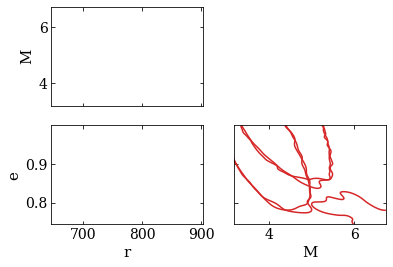

In [383]:
modelChoices = ["vdm2012","fiducial2021"]
include_vTravel = [True, False]


fig,ax = plt.subplots(2,2)
for mod in modelChoices:
    for incl in include_vTravel:
        data = az.from_json(f"../pymc3-data/{mod}_vTravel_{incl}.json")
        az.plot_pair(data, 
                     kind='kde', 
                     contour=True,
                     var_names=['r', 'M', 'e'], 
                     fill_last=False, 
                     kde_kwargs=dict(contourf_kwargs={"alpha":0}, 
                                     contour_kwargs={"colors": "tab:red","levels":[0.14,0.86]}),
                     ax=ax)


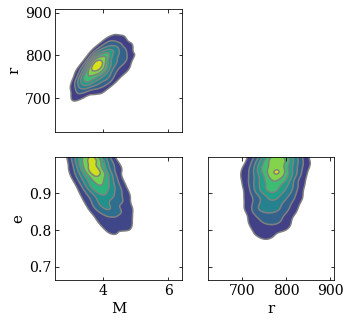

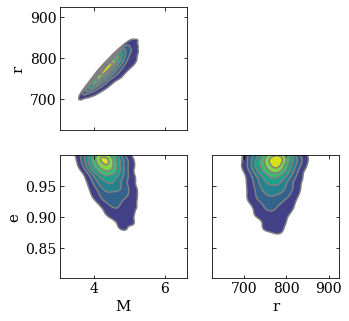

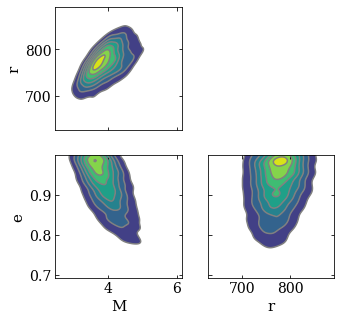

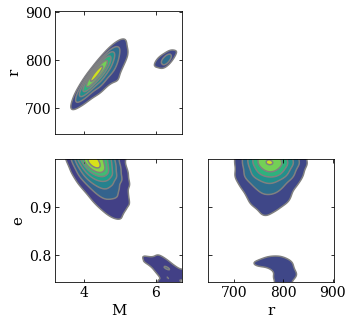

In [266]:


for mod in modelChoices:
    for incl in include_vTravel:
        data = az.from_json(f"../pymc3-data/{mod}_vTravel_{incl}.json")
        az.plot_pair(data, 
                     kind='kde',
                     show=True,
                     var_names=['M', 'r','e'],
                     figsize=(5,5))

In [409]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]
include_vTravel = [False, True]
label_vtravel = ["with vtravel = 0","with vtravel=32km/s"]
colors = ['blue','blue','pink','pink']
style = ['dotted','solid','dotted','solid']

i=0
fig = plt.figure(figsize=(10,8))

for mod,name in zip(modelChoices,label_model):
    for incl,vname in zip(include_vTravel,label_vtravel):
        data = az.from_json(f"../pymc3-data/{mod}_vTravel_{incl}.json")
        howdy = np.vstack([np.asarray(data.posterior[i]).ravel() for i in ["M","r","e"]])
        corner.corner(howdy.T,
                            quantiles=(0.16, 0.84),
                            labels=[r"M$_{\rm LG}$ [$10^{12}$ M$_\odot$]","r [kpc]","e"],
                            plot_datapoints=False,
                            plot_density=False,
                            color=colors[i],
                            linestyles=style[i],
                            fig=fig,
                            levels=[0.68, 0.95],
                            truth=truths,
                            contour_kwargs=dict(linestyles="--"));
# fig.suptitle(f'{name} {vname}')
# fig.savefig(f'../plots/{mod}_vtravel_{incl}.png',dpi=300)

        i+=1
plt.show()





FileNotFoundError: [Errno 2] No such file or directory: '../pymc3-data/vdm2012_vTravel_False.json'

<Figure size 720x576 with 0 Axes>

In [ ]:
samples, kind='kde', contour=True,
             var_names=['r', 'M', 'e'], fill_last=False, 
             kde_kwargs=dict(contourf_kwargs={"alpha":0}, 
                             contour_kwargs={"colors": "tab:red"})

In [268]:
np.asarray((data.posterior['M']).mean())

array(3.96027419)

___
## Mass vs vtravel

In [431]:
means_vtravel[mod]['vtravel']

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100])

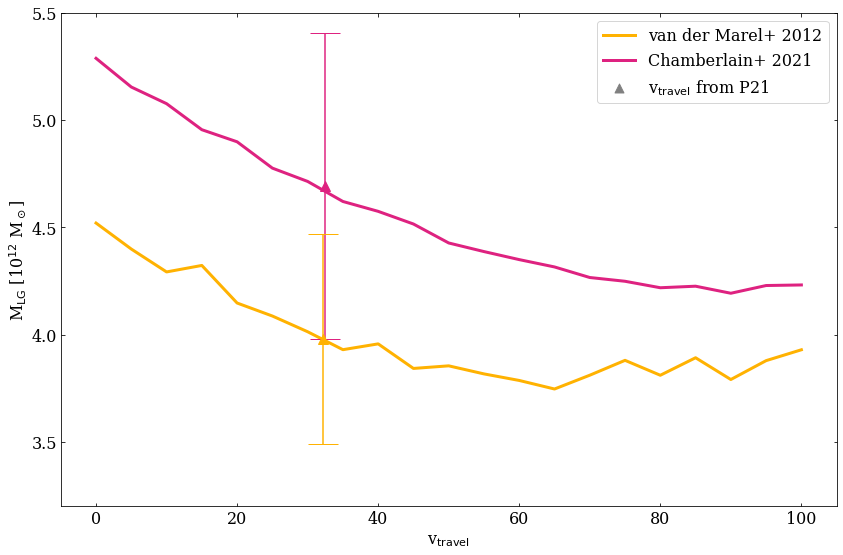

In [16]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]


color = [palette['Minor Pairs'],palette["Extra"]]
alpha = [0.2,0.4]

fig,ax=plt.subplots(figsize=(12,8))
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    bottoms = means_vtravel[mod]['M']-stds_vtravel[mod]['M']
    tops = means_vtravel[mod]['M']+stds_vtravel[mod]['M']
    
    plt.plot(means_vtravel[mod]['vtravel'], means_vtravel[mod]['M'],
             label=lab, color=col, lw=3)
#     plt.errorbar(x=means_vtravel_meas[mod]['vtravel']+al, 
#                  y=means_vtravel_meas[mod]['M'],
#                  yerr=stds_vtravel_meas[mod]['M'],
#                  color=col,capsize=15,marker='^',ms=10)
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    plt.errorbar(x=means_vtravel_meas[mod]['vtravel']+al, 
                 y=means_vtravel_meas[mod]['M'],
                 yerr=stds_vtravel_meas[mod]['M'],
                 color=col,capsize=15,marker='^',ms=10)
    #ax.fill_between(means_vtravel[mod]['vtravel'], bottoms, tops, alpha=al,color=col)

#     ax.axhline(means[mod]['M'],linestyle='dotted',color=col)
#     ax.axhline(means[mod+"_vtravel"]['M'],linestyle='dashed',color=col)
plt.scatter(0,0,label=r'v$_{\rm travel}$ from P21',marker="^",s=80,color='grey')
ax.set_xlabel(r'v$_{\rm travel}$')
ax.set_ylabel(r'M$_{\rm LG}$ [10$^{12}$ M$_\odot$]')
plt.legend()
plt.ylim(3.2,5.5)
plt.tight_layout()
plt.savefig("../plots/analyze-runs-MvV.png",dpi=300)
plt.show()

___
## Mass constraint vs. pm error

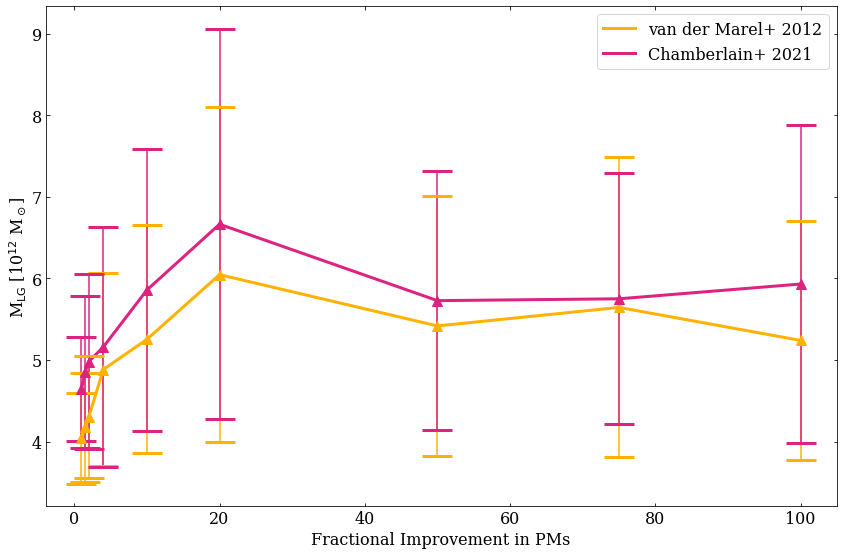

In [34]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]


color = [palette['Minor Pairs'],palette["Extra"]]
alpha = [0.2,0.4]

fig,ax=plt.subplots(figsize=(12,8))
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    
    plt.plot(means_pmimprov[mod]['pm_errs'], means_pmimprov[mod]['M'],
             label=lab, color=col, lw=3)

for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    plt.errorbar(x=means_pmimprov[mod]['pm_errs'], 
                 y=means_pmimprov[mod]['M'],
                 yerr=stds_pmimprov[mod]['M'],
                 color=col, capsize=15,
                 capthick=3, marker='^',ms=10,
                 linestyle="")

# plt.scatter(0,0,label=r'v$_{\rm travel}$ from P21',marker="^",s=80,color='grey')
ax.set_xlabel(r'Fractional Improvement in PMs')
ax.set_ylabel(r'M$_{\rm LG}$ [10$^{12}$ M$_\odot$]')
plt.legend()
# plt.ylim(3.2,5.5)
plt.tight_layout()
plt.savefig("../plots/analyze-runs-MvsPM.png",dpi=300)
plt.show()

In [41]:
stds_pmimprov['vdm2012']["pm_errs"]==10

array([False, False, False, False,  True, False, False, False, False])

In [43]:
stds_pmimprov['vdm2012']["M"][stds_pmimprov['vdm2012']["pm_errs"]==10]

array([1.39685868])

---

In [394]:
means["fiducial2021"]["M"]

array(4.75244883)

In [387]:
means["fiducial2021_vtravel"]["M"]

array(3.96027419)

In [393]:
means_vtravel['fiducial2021']["M"][means_vtravel['fiducial2021']['vtravel']==30]

array([4.67918097])

In [273]:
# dataset = "vdm2012"
# vtrav_bool = True

# data = az.from_json(f"../pymc3-data/{dataset}_vTravel_{vtrav_bool}.json")
# data

In [5]:
# dataset = "vdm2012"
# vtrav_bool = True

# data = az.from_json(f"../pymc3-data/{dataset}_vTravel_{vtrav_bool}.json")
        
# az.plot_pair(data, 
#              kind='kde',
#              show=True,
#              var_names=['M', 'r', 'e'],
#              figsize=(5,5))

In [ ]:
# get those means bby!!
# ---------------------

modelChoices = ["vdm2012","fiducial2021"]
vtravels = np.array([20,25,30,35,40,45,50,55,60,65,70,75]) 

means = {}

for mod in modelChoices:
    means[mod]={}
    
    for vs in vtravels:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vs}.json")
        means[mod]['vtravel'] = vs
        
        for param in ["M","r","e"]:
            means[label][param] = np.asarray((data.posterior[param]).mean())

